> # Imports

In [1]:
#my modules
import acquire as ac
import prepare as pp
import explore as ex
import evaluate as ev

#standard
import pandas as pd
import numpy as np
import re

#scraping
import requests
from requests import get
from bs4 import BeautifulSoup

#file
import os
import json
from typing import Dict, List, Optional, Union, cast

#vizz
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#preprocess
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#split and model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

random_state=123

json file found and loaded
imports loaded successfully, awaiting commands...


## Acquire

In [2]:
#get the data
click_data = ac.button_click()
click_data

json file found and loaded


,string
0,sindresorhus / awesome
1,vinta / awesome-python
2,awesome-selfhosted / awesome-selfhosted
3,avelino / awesome-go
4,trimstray / the-book-of-secret-knowledge
...,...
735,hetznercloud / awesome-hcloud
736,chinaBerg / awesome-canvas
737,RichardLitt / awesome-conferences
738,styfle / awesome-desktop-js


In [3]:
click_data

,string
0,sindresorhus / awesome
1,vinta / awesome-python
2,awesome-selfhosted / awesome-selfhosted
3,avelino / awesome-go
4,trimstray / the-book-of-secret-knowledge
...,...
735,hetznercloud / awesome-hcloud
736,chinaBerg / awesome-canvas
737,RichardLitt / awesome-conferences
738,styfle / awesome-desktop-js


## Prepare

In [4]:
#no duplicated repos
click_data[click_data.duplicated()]

,string


In [5]:
#cleaned the data and changed from a df to a list!
ac.REPOS

['sindresorhus/awesome',
 'vinta/awesome-python',
 'awesome-selfhosted/awesome-selfhosted',
 'avelino/awesome-go',
 'trimstray/the-book-of-secret-knowledge',
 'papers-we-love/papers-we-love',
 '521xueweihan/HelloGitHub',
 'Hack-with-Github/Awesome-Hacking',
 'jaywcjlove/awesome-mac',
 'enaqx/awesome-react',
 'DopplerHQ/awesome-interview-questions',
 'MunGell/awesome-for-beginners',
 'sindresorhus/awesome-nodejs',
 'prakhar1989/awesome-courses',
 'Solido/awesome-flutter',
 'fffaraz/awesome-cpp',
 'wasabeef/awesome-android-ui',
 'binhnguyennus/awesome-scalability',
 'vsouza/awesome-ios',
 'tiimgreen/github-cheat-sheet',
 'dypsilon/frontend-dev-bookmarks',
 'akullpp/awesome-java',
 'brillout/awesome-react-components',
 'serhii-londar/open-source-mac-os-apps',
 'rust-unofficial/awesome-rust',
 'dkhamsing/open-source-ios-apps',
 'DovAmir/awesome-design-patterns',
 'ziadoz/awesome-php',
 'goabstract/Awesome-Design-Tools',
 'alebcay/awesome-shell',
 'herrbischoff/awesome-macos-command-line',


In [6]:
scraped = ac.get_scraped_data()

json file found and loaded


In [7]:
#GOT THE DATA! Look at it...
scraped

,repo,language,readme_contents
0,sindresorhus/awesome,None,"<div align=""center"">\n\t<a href=""https://vshym..."
1,vinta/awesome-python,Python,# Awesome Python [![Awesome](https://cdn.rawgi...
2,awesome-selfhosted/awesome-selfhosted,Makefile,# Awesome-Selfhosted\n\n[![Awesome](https://cd...
3,avelino/awesome-go,Go,"# Awesome Go\n\n<a href=""https://awesome-go.co..."
4,trimstray/the-book-of-secret-knowledge,None,"<p align=""center"">\n <a href=""https://github...."
...,...,...,...
735,hetznercloud/awesome-hcloud,None,# Awesome Hetzner Cloud\n\nA curated list of l...
736,chinaBerg/awesome-canvas,None,![](./assets/logo.png)\n## awesome-canvas\nLis...
737,RichardLitt/awesome-conferences,Ruby,# Awesome Conferences [![Awesome](https://cdn....
738,styfle/awesome-desktop-js,None,"<img width=""128"" height=""128"" src=""https://cd..."


In [8]:
#readme_contents looks like what I need.. but how many did I grab?
len(scraped)

740

In [9]:
#clean the readme
df = pp.clean_df(scraped, 'readme_contents')
df

,repo,language,readme
0,sindresorhus/awesome,other,div align center href http vshymanskyy standwi...
1,vinta/awesome-python,python,awesome python awesome http cdn rawgit sindres...
2,awesome-selfhosted/awesome-selfhosted,other,awesome selfhosted awesome http cdn jsdelivr n...
3,avelino/awesome-go,go,awesome go href http awesome go img align righ...
4,trimstray/the-book-of-secret-knowledge,other,p align center href http trimstray book secret...
...,...,...,...
735,hetznercloud/awesome-hcloud,other,awesome hetzner cloud curated list library too...
736,chinaBerg/awesome-canvas,other,asset logo png awesome canvas list awesome htm...
737,RichardLitt/awesome-conferences,other,awesome conference awesome http cdn rawgit sin...
738,styfle/awesome-desktop-js,other,img width height src http cdn jsdelivr net npm...


## Explore

In [10]:
#checking for nulls
df.isnull().sum()

repo        0
language    0
readme      0
dtype: int64

In [11]:
#counts and frequencies of languages
freq = ex.show_counts_and_ratios(df, 'language')
freq

,n,percent
other,599,0.81
python,40,0.05
javascript,36,0.05
html,25,0.03
shell,19,0.03
java,11,0.01
go,10,0.01


In [12]:
# #lowering all the languages
# df['language'] = pp.lower_everything(df['language'])

## 1. What are the most common words in READMEs?

In [13]:
#grabbing a df to get the most common words in all
word_counts = ex.get_words(df)
word_counts

Unfiltered Data:187422 words  Filtered Data: 4000 words



,all,python,javascript,html,shell,java,go,other
http,216403,13261,11087,5400,6164,2811,4422,173258
img,22653,2659,1573,112,268,1171,131,16739
code,14546,1457,534,242,198,209,276,11630
awesome,13657,412,926,309,369,43,113,11485
source,12573,408,783,217,146,121,107,10791
...,...,...,...,...,...,...,...,...
pastebin,76,6,3,0,4,0,0,63
demonstrate,76,3,1,3,0,1,0,68
degree,76,4,3,4,4,0,0,61
overhead,76,0,5,4,4,3,3,57


In [14]:
#top 10 most common words
word_counts['all'].sort_values(ascending=False).head(20)

http       216403
img         22653
code        14546
awesome     13657
source      12573
star        12353
data        11898
web         11368
tool        11035
library     11006
href        10385
shield      10256
open         9669
go           9634
svg          9286
html         8824
style        8661
badge        8569
python       8293
image        8176
Name: all, dtype: int64

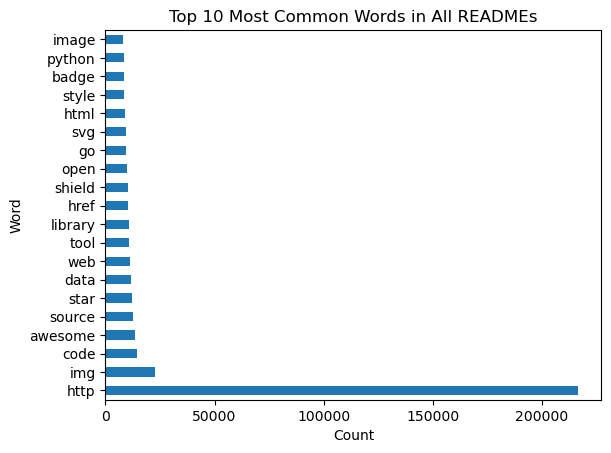

In [15]:
#vizz
word_counts['all'].sort_values(ascending=False).head(20).plot.barh()
plt.title('Top 10 Most Common Words in All READMEs')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

The top 10 most common words across all README's are above.

## 3. Do different programming languages use a different number of unique words?

In [16]:
#looking at all unique words per language
word_counts.nunique()

all           1147
python         272
javascript     257
html           187
shell          180
java           125
go             146
other         1098
dtype: int64

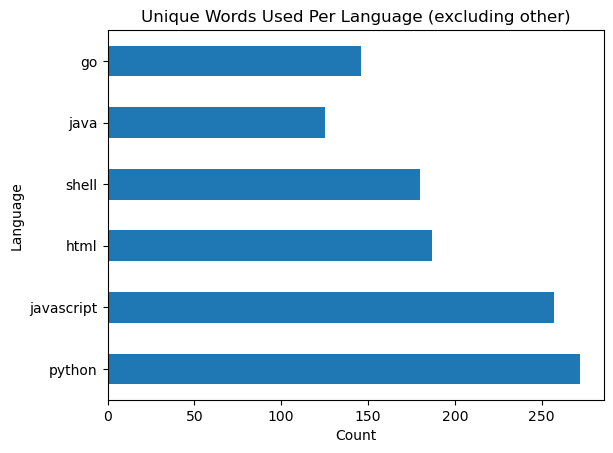

In [17]:
#vizz
word_counts.drop(columns={'all', 'other'}).nunique().plot.barh()
plt.title('Unique Words Used Per Language (excluding other)')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

Yes, different languages use different amounts of unique words in their READMEs. With Python containing the most and Java containing the least.

## 4. Are there any words that uniquely identify a programming language?

In [18]:
word_counts['python'].sort_values(ascending=False).head(15)

http      13261
img        2659
yes        1766
px         1707
li         1530
src        1480
code       1457
width      1430
image      1383
api        1268
badge      1231
star       1211
shield     1200
data       1087
ago        1000
Name: python, dtype: int64

In [19]:
word_counts.sort_values('python', ascending=False).head(20).apply(lambda row: row/row['all'], axis=1).round(2)

,all,python,javascript,html,shell,java,go,other
http,1.0,0.06,0.05,0.02,0.03,0.01,0.02,0.80
img,1.0,0.12,0.07,0.00,0.01,0.05,0.01,0.74
yes,1.0,0.94,0.00,0.00,0.00,0.00,0.00,0.05
px,1.0,0.55,0.01,0.00,0.00,0.00,0.04,0.40
li,1.0,0.42,0.00,0.01,0.00,0.00,0.00,0.57
src,1.0,0.19,0.05,0.01,0.02,0.00,0.01,0.72
code,1.0,0.10,0.04,0.02,0.01,0.01,0.02,0.80
width,1.0,0.32,0.05,0.00,0.01,0.00,0.01,0.62
image,1.0,0.17,0.03,0.02,0.01,0.00,0.01,0.75
api,1.0,0.17,0.06,0.02,0.01,0.01,0.03,0.70


In [20]:
# sort by 'ham' and 'spam' columns
word_counts.sort_values(['python', 'javascript', 'html', 'shell', 'java', 'go', 'other', 'all'], ascending=False).head(20) # use a list to sort by more than one column!

,all,python,javascript,html,shell,java,go,other
http,216403,13261,11087,5400,6164,2811,4422,173258
img,22653,2659,1573,112,268,1171,131,16739
yes,1871,1766,1,0,5,0,3,96
px,3095,1707,17,4,3,2,131,1231
li,3652,1530,12,24,0,6,0,2080
src,7969,1480,388,69,121,26,110,5775
code,14546,1457,534,242,198,209,276,11630
width,4522,1430,218,18,25,7,29,2795
image,8176,1383,256,164,113,30,64,6166
api,7287,1268,465,137,44,51,211,5111


In [21]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

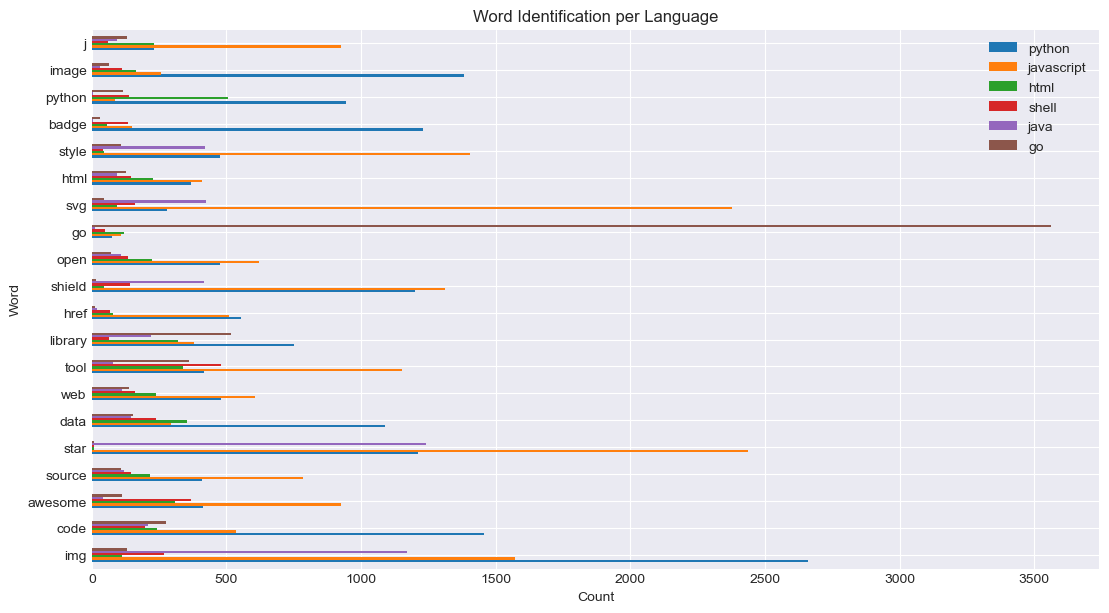

In [22]:
#visualizing the top 20 words sorted on all but only displaying the ham and spam columns

# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

#viz
word_counts.sort_values('all', ascending=False)[1:21][['python', 'javascript', 'html', 'shell', 'java', 'go']].head(20).plot.barh()
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Word Identification per Language')
plt.show()

*Out of the top 20 words:*

Image, python, badge, data, and img identify highly with Python
<br>
J, star, img, style, and svg identify highly with JavaScript
<br>
Python and data identify with HTML
<br>
Tool, code, and img identify with Shell
<br>
Star and img identify with Java
<br>
Go uniquely identifies the language Go, kind of a freebie

## Preprocessing

In [23]:
df

,repo,language,readme
0,sindresorhus/awesome,other,div align center href http vshymanskyy standwi...
1,vinta/awesome-python,python,awesome python awesome http cdn rawgit sindres...
2,awesome-selfhosted/awesome-selfhosted,other,awesome selfhosted awesome http cdn jsdelivr n...
3,avelino/awesome-go,go,awesome go href http awesome go img align righ...
4,trimstray/the-book-of-secret-knowledge,other,p align center href http trimstray book secret...
...,...,...,...
735,hetznercloud/awesome-hcloud,other,awesome hetzner cloud curated list library too...
736,chinaBerg/awesome-canvas,other,asset logo png awesome canvas list awesome htm...
737,RichardLitt/awesome-conferences,other,awesome conference awesome http cdn rawgit sin...
738,styfle/awesome-desktop-js,other,img width height src http cdn jsdelivr net npm...


In [24]:
word_counts

,all,python,javascript,html,shell,java,go,other
http,216403,13261,11087,5400,6164,2811,4422,173258
img,22653,2659,1573,112,268,1171,131,16739
code,14546,1457,534,242,198,209,276,11630
awesome,13657,412,926,309,369,43,113,11485
source,12573,408,783,217,146,121,107,10791
...,...,...,...,...,...,...,...,...
pastebin,76,6,3,0,4,0,0,63
demonstrate,76,3,1,3,0,1,0,68
degree,76,4,3,4,4,0,0,61
overhead,76,0,5,4,4,3,3,57


In [25]:
# words = df.readme.str.split()[0]
# len(words)

In [26]:
# len([word for word in words if word in keep_words])

In [27]:
#make a list called keep_words
keep_words = word_counts.index.tolist()

In [28]:
# #chop out all the words not in keep_words
# df.readme.apply([word for word in words if word in keep_words])

In [29]:
# test = df.readme[0]
# test = 'hhelo welrkjwli img'

In [30]:
def clean_readme(test):
    words = test.split()
    clean_words = [word for word in words if word in keep_words]
    clean_words = ' '.join(clean_words)
    return clean_words

In [31]:
df.readme = df.readme.apply(clean_readme)

In [32]:
df.head(1)

,repo,language,readme
0,sindresorhus/awesome,other,div align center href http img width height sr...


In [33]:
# make the thing
cv = CountVectorizer()

# fit the thing
# use the thing
bag_of_words = cv.fit_transform(df.readme) #everything is getting transformed on the same data set because we haven't split yet
bag_of_words

<740x3982 sparse matrix of type '<class 'numpy.int64'>'
	with 379786 stored elements in Compressed Sparse Row format>

In [34]:
bag_of_words.todense() 


matrix([[0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [35]:
#this is what is happening under the hood for the countvectorizer and todense functions
bow = pd.DataFrame(bag_of_words.todense(), columns = cv.get_feature_names_out())
bow

,aa,aaai,ab,abc,ability,able,abstract,abstraction,abuse,ac,...,zh,zhang,zhihu,zhuanlan,zip,zlib,zone,zoom,zsh,zvm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,2,1,2,1,0,0,...,0,0,0,0,1,9,0,0,0,0
3,0,0,1,0,4,1,2,7,0,0,...,1,0,0,0,3,0,1,2,0,0
4,0,0,4,0,1,0,0,0,2,0,...,0,0,0,0,1,0,0,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,1,0,0,0,0,0,0,0,0,0,...,20,0,3,2,0,0,0,1,0,0
737,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Frequency using a lambda (to use the lambda in a DF use the .apply() to apply it to each row in the df) axis=1 because the default is by column
bow.apply(lambda row: row/ row.sum(), axis=1)

#returns frequency by row

,aa,aaai,ab,abc,ability,able,abstract,abstraction,abuse,ac,...,zh,zhang,zhihu,zhuanlan,zip,zlib,zone,zoom,zsh,zvm
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000328,0.0
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000152,0.000304,0.000000,0.0,...,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
2,0.000042,0.0,0.000000,0.000042,0.000084,0.000042,0.000084,0.000042,0.000000,0.0,...,0.000000,0.0,0.00000,0.00000,0.000042,0.000378,0.00000,0.00000,0.000000,0.0
3,0.000000,0.0,0.000040,0.000000,0.000160,0.000040,0.000080,0.000281,0.000000,0.0,...,0.000040,0.0,0.00000,0.00000,0.000120,0.000000,0.00004,0.00008,0.000000,0.0
4,0.000000,0.0,0.000197,0.000000,0.000049,0.000000,0.000000,0.000000,0.000099,0.0,...,0.000000,0.0,0.00000,0.00000,0.000049,0.000000,0.00000,0.00000,0.000790,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
736,0.000140,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.002797,0.0,0.00042,0.00028,0.000000,0.000000,0.00000,0.00014,0.000000,0.0
737,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001370,0.000000,0.0,...,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0
738,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0


In [37]:
#Augmented Frequency
bow.apply(lambda row: (row/ row.sum()) / (row/ row.sum()).max(), axis=1)

#divides by the max frequency

,aa,aaai,ab,abc,ability,able,abstract,abstraction,abuse,ac,...,zh,zhang,zhihu,zhuanlan,zip,zlib,zone,zoom,zsh,zvm
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002976,0.0
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001458,0.002915,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000385,0.0,0.000000,0.000385,0.000769,0.000385,0.000769,0.000385,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000385,0.003462,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000367,0.000000,0.001468,0.000367,0.000734,0.002570,0.000000,0.0,...,0.000367,0.0,0.000000,0.000000,0.001101,0.000000,0.000367,0.000734,0.000000,0.0
4,0.000000,0.0,0.002176,0.000000,0.000544,0.000000,0.000000,0.000000,0.001088,0.0,...,0.000000,0.0,0.000000,0.000000,0.000544,0.000000,0.000000,0.000000,0.008705,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
736,0.001094,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.021882,0.0,0.003282,0.002188,0.000000,0.000000,0.000000,0.001094,0.000000,0.0
737,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007143,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
738,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


### TFIDF Vectorizing

In [38]:
#make it
tfidf = TfidfVectorizer()

#fit it/use it
bag_of_words = tfidf.fit_transform(df.readme) #fit and transform on original df as we have not split yet 
bag_of_words

<740x3982 sparse matrix of type '<class 'numpy.float64'>'
	with 379786 stored elements in Compressed Sparse Row format>

In [39]:
#view the object
bag_of_words.todense()

#returns the actual values inside of the sparse matrix

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.00448005,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00066915, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [40]:
#dataframe it
pd.DataFrame(bag_of_words.todense(), columns=tfidf.get_feature_names_out()).round(2)

#this is trying to tell us how ``important`` a word is across the corpus...

#this shows in df format the term frequencies of each word
    #how often a word shows up in a document

,aa,aaai,ab,abc,ability,able,abstract,abstraction,abuse,ac,...,zh,zhang,zhihu,zhuanlan,zip,zlib,zone,zoom,zsh,zvm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.03,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [41]:
# TO ONLY VIEW THE IDF SCORE!!!!!!

# zip: put these two things of the same length together
# dict: turn those two associated things into a k: v pair
# pd.Series: turn those keys into indices, and the values into values

zip(tfidf.get_feature_names_out(), tfidf.idf_) #zipper together!
dict( zip(tfidf.get_feature_names_out(), tfidf.idf_) ) #turn into dict
pd.Series( dict( zip(tfidf.get_feature_names_out(), tfidf.idf_) ) ) #turn into series

#A higher IDF means that a word provides more information. That is, it is more relevant within a ```single``` document. 
#the higher the number - the least amount of documents it is in, so the more unique it is.

aa         2.983028
aaai       4.429947
ab         2.443215
abc        4.174013
ability    2.828877
             ...   
zlib       4.612268
zone       3.757853
zoom       3.716180
zsh        3.894429
zvm        6.509388
Length: 3982, dtype: float64

### SPLIT

In [42]:
train, validate, test = ev.split_data_strat(df, 'language')

Prepared DF: (740, 3)
Train: (444, 3)
Validate: (148, 3)
Test: (148, 3)


## LOOK AT TRAIN FOR WORDCLOUD

In [43]:
' '.join(train.readme)[:100]

'awesome ai finance awesome http awesome badge svg http sindresorhus awesome community http img shiel'

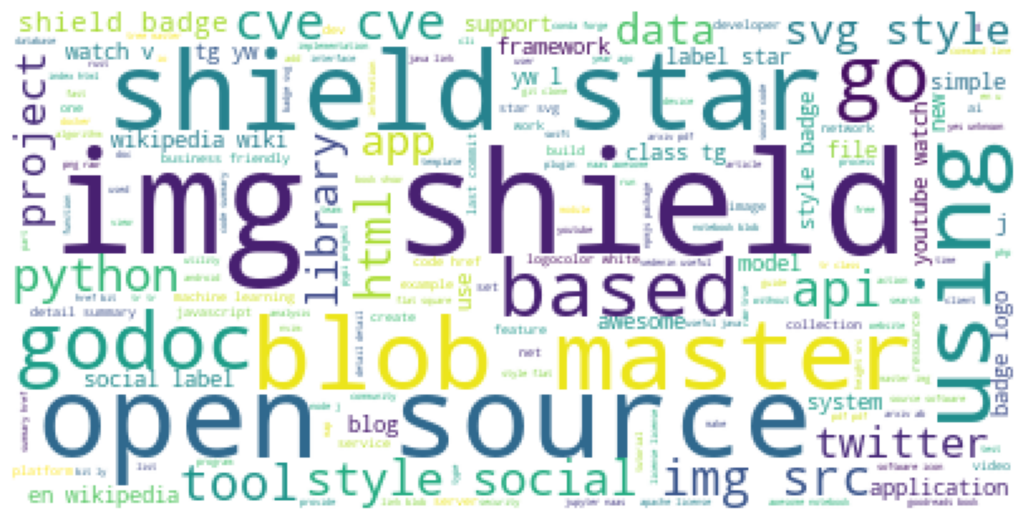

In [44]:
img = WordCloud(background_color='white').generate(' '.join(train.readme))
plt.imshow(img)
plt.axis('off')
plt.show()

## MODELING

In [45]:
#set a baseline!!
#other is the highest single category
df.language.value_counts()

other         599
python         40
javascript     36
html           25
shell          19
java           11
go             10
Name: language, dtype: int64

In [46]:
train['baseline_prediction'] = 'other'

In [47]:
baseline_accuracy = (train.baseline_prediction == train.language).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 80.86%


In [48]:
#assign variables
X_train = train.readme #prepared text
y_train = train.language #the label we are trying to predict for classification

X_validate = validate.readme
y_validate = validate.language

X_test = test.readme
y_test = test.language

In [49]:
#make my bag of words
cv = CountVectorizer()

#fit and transform my bag of words on X_train!
X_bow = cv.fit_transform(X_train)

#only transform on validate and test! Because what you do to your train bag of words, you must do to your test bag of words
X_validate_bow = cv.transform(X_validate)
X_test_bow = cv.transform(X_test)

In [50]:
#build model 1
tree3 = DecisionTreeClassifier(max_depth=3) #because decision tree likes to overfit

#fit on bag_of_words
tree3.fit(X_bow, y_train)

#use on bag of words
tree3.score(X_bow, y_train).round(2)
tree3.score(X_validate_bow, y_validate).round(2)
                #^^^ this is the accuracy score!!
    
print(f'Decision Tree/Max Depth=3: `train` accuracy: {tree3.score(X_bow, y_train):.2%}')
print(f'Decision Tree/Max Depth=3: `validate` accuracy: {tree3.score(X_validate_bow, y_validate):.2%}')

Decision Tree/Max Depth=3: `train` accuracy: 82.66%
Decision Tree/Max Depth=3: `validate` accuracy: 79.73%


In [51]:
#build model 2
knn5 = KNeighborsClassifier(5)

#fit on bag_of_words
knn5.fit(X_bow, y_train)

#use on train and validate
knn5.score(X_bow, y_train).round(2)
knn5.score(X_validate_bow, y_validate).round(2)
  #^^^ this is the accuracy score!!
    
print(f'KNN/Neighbors=5: `train` accuracy: {knn5.score(X_bow, y_train):.2%}')
print(f'KNN/Neighbors=5: `validate` accuracy: {knn5.score(X_validate_bow, y_validate):.2%}')

KNN/Neighbors=5: `train` accuracy: 82.21%
KNN/Neighbors=5: `validate` accuracy: 79.05%


In [52]:
#build model 3
knn9 = KNeighborsClassifier(9)

#fit on bag_of_words
knn9.fit(X_bow, y_train)

#use on train and validate
knn9.score(X_bow, y_train).round(2)
knn9.score(X_validate_bow, y_validate).round(2)
  #^^^ this is the accuracy score!!
    
print(f'KNN/Neighbors=9: `train` accuracy: {knn9.score(X_bow, y_train):.2%}')
print(f'KNN/Neighbors=9: `validate` accuracy: {knn9.score(X_validate_bow, y_validate):.2%}')

KNN/Neighbors=9: `train` accuracy: 81.53%
KNN/Neighbors=9: `validate` accuracy: 82.43%


In [53]:
#TEST using model 3
#build model 3
knn9 = KNeighborsClassifier(9)

#fit on bag_of_words
knn9.fit(X_bow, y_train)

#use on train and validate
knn9.score(X_test_bow, y_test).round(2)
  #^^^ this is the accuracy score!!
    
print(f'baseline accuracy: {baseline_accuracy:.2%}')
print(f'KNN/Neighbors=9: `test` accuracy: {knn9.score(X_test_bow, y_test):.2%}')

baseline accuracy: 80.86%
KNN/Neighbors=9: `test` accuracy: 81.76%


In [55]:
X_train, y_train, X_validate, y_validate, X_test, y_test = ev.assign_variables(train, validate, test)

In [56]:
X_bow, X_validate_bow, X_test_bow = ev.make_bag_o_words(X_train, X_validate, X_test)

In [57]:
ev.model_one(X_bow, y_train, X_validate_bow, y_validate)

Decision Tree / Max Depth = 3: `train` accuracy: 83.00%
Decision Tree / Max Depth = 3: `validate` accuracy: 79.00%


(0.83, 0.79)

In [61]:
ev.model_two(X_bow, y_train, X_validate_bow, y_validate)

KNN / Neighbors = 5: `train` accuracy: 82.00%
KNN / Neighbors = 5: `validate` accuracy: 79.00%


(0.82, 0.79)

In [62]:
ev.model_three(X_bow, y_train, X_validate_bow, y_validate)

KNN / Neighbors = 9: `train` accuracy: 82.00%
KNN / Neighbors = 9: `validate` accuracy: 82.00%


(0.82, 0.82)

In [63]:
ev.test_model(X_bow, y_train, X_test_bow, y_test)

baseline accuracy: 80.68%
KNN/Neighbors=9: `test` accuracy: 82.00%


0.82